In [1]:
!rm -rf models
!rm -rf utils
!rm -rf main.py
!rm -rf requirements.txt

In [2]:
!git clone https://github.com/ManjeeraJ/PyTorch-Models-Era.git
!mv PyTorch-Models-Era/models ./
!mv PyTorch-Models-Era/utils ./
!mv PyTorch-Models-Era/main.py ./
!mv PyTorch-Models-Era/requirements.txt ./
!rm -rf PyTorch-Models-Era

Cloning into 'PyTorch-Models-Era'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 63 (delta 32), reused 43 (delta 15), pack-reused 0
Receiving objects: 100% (63/63), 16.73 KiB | 8.36 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [6]:
!pip install -r requirements.txt

  Using cached albumentations-1.2.1-py3-none-any.whl (116 kB)
  Using cached grad-cam-1.4.6.tar.gz (7.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38239 sha256=5b50d208c2d6d18bf621cfc5d96da6a4932da019b572e9054d3905d2321a9fbc
  Stored in directory: /root/.cache/pip/wheels/3c/6c/04/9a543775e9f25f6c441180a552456f1696167439459730ff87
Successfully built grad-cam
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1


In [8]:
!pip install pytorch-lightning

In [9]:
from pytorch_lightning import LightningModule, Trainer
from utils.utils import (
    get_device,
    show_misclassified_images)
import torch
from models.resnet import Lit_CIFAR10_Resnet18
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from utils.utils_lit import (
    get_misclassified_images,
    show_grad_cam)

In [11]:
is_cuda_available, device = get_device()
BATCH_SIZE = 512 if torch.cuda.is_available() else 64

In [22]:
model = Lit_CIFAR10_Resnet18(lr=0.001, batch_size = BATCH_SIZE)
trainer = Trainer(
    max_epochs=1,
    accelerator="auto",
    devices=1 if is_cuda_available else None,  # Uses accelerator="auto" and devices=1 if torch.cuda.is_available() else None. This setup automatically selects the best available accelerator (CPU or GPU) and limits the run to 1 device if a GPU is available, which is helpful for running in environments like Jupyter notebooks.
    logger=CSVLogger(save_dir="logs/"),  # Does not specify any logger, so it uses the default logger provided by PyTorch Lightning, which is usually a TensorBoard logger.
    callbacks=[LearningRateMonitor(logging_interval="step"), TQDMProgressBar(refresh_rate=10)],  # Logs the learning rate at each step, Customizes the TQDM progress bar to refresh every 10 steps.Uses progress_bar_refresh_rate=10, which sets the refresh rate for the default progress bar. Note that this argument is deprecated in recent versions of PyTorch Lightning; instead, you should use the TQDMProgressBar callback.
)

trainer.fit(model)
trainer.test(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | model | ResNet | 11.2 M | train
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


Files already downloaded and verified
Files already downloaded and verified


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.5385000109672546     │
│         test_loss         │    1.3092173337936401     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.3092173337936401, 'test_acc': 0.5385000109672546}]

In [15]:
# Logs not showing up. Need to fix it.

# import pandas as pd
# import seaborn as sn

# metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
# del metrics["step"]
# metrics.set_index("epoch", inplace=True)
# display(metrics.dropna(axis=1, how="all").head())
# sn.relplot(data=metrics, kind="line")

%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Launching TensorBoard...

KeyboardInterrupt: 

In [23]:
torch.save(model.model.state_dict(), "Lit_CIFAR10_Resnet18_trained.pt")

In [12]:
model = Lit_CIFAR10_Resnet18()
model.load_state_dict(torch.load("Lit_CIFAR10_Resnet18_trained.pt", map_location=torch.device(device)), strict=False)
model.prepare_data()
model.setup()

_IncompatibleKeys(missing_keys=['model.conv1.weight', 'model.bn1.weight', 'model.bn1.bias', 'model.bn1.running_mean', 'model.bn1.running_var', 'model.layer1.0.conv1.weight', 'model.layer1.0.bn1.weight', 'model.layer1.0.bn1.bias', 'model.layer1.0.bn1.running_mean', 'model.layer1.0.bn1.running_var', 'model.layer1.0.conv2.weight', 'model.layer1.0.bn2.weight', 'model.layer1.0.bn2.bias', 'model.layer1.0.bn2.running_mean', 'model.layer1.0.bn2.running_var', 'model.layer1.1.conv1.weight', 'model.layer1.1.bn1.weight', 'model.layer1.1.bn1.bias', 'model.layer1.1.bn1.running_mean', 'model.layer1.1.bn1.running_var', 'model.layer1.1.conv2.weight', 'model.layer1.1.bn2.weight', 'model.layer1.1.bn2.bias', 'model.layer1.1.bn2.running_mean', 'model.layer1.1.bn2.running_var', 'model.layer2.0.conv1.weight', 'model.layer2.0.bn1.weight', 'model.layer2.0.bn1.bias', 'model.layer2.0.bn1.running_mean', 'model.layer2.0.bn1.running_var', 'model.layer2.0.conv2.weight', 'model.layer2.0.bn2.weight', 'model.layer2.0.b

In [17]:
misclassified_images, predictions, labels = get_misclassified_images(model, device=torch.device("cpu"))

made a change


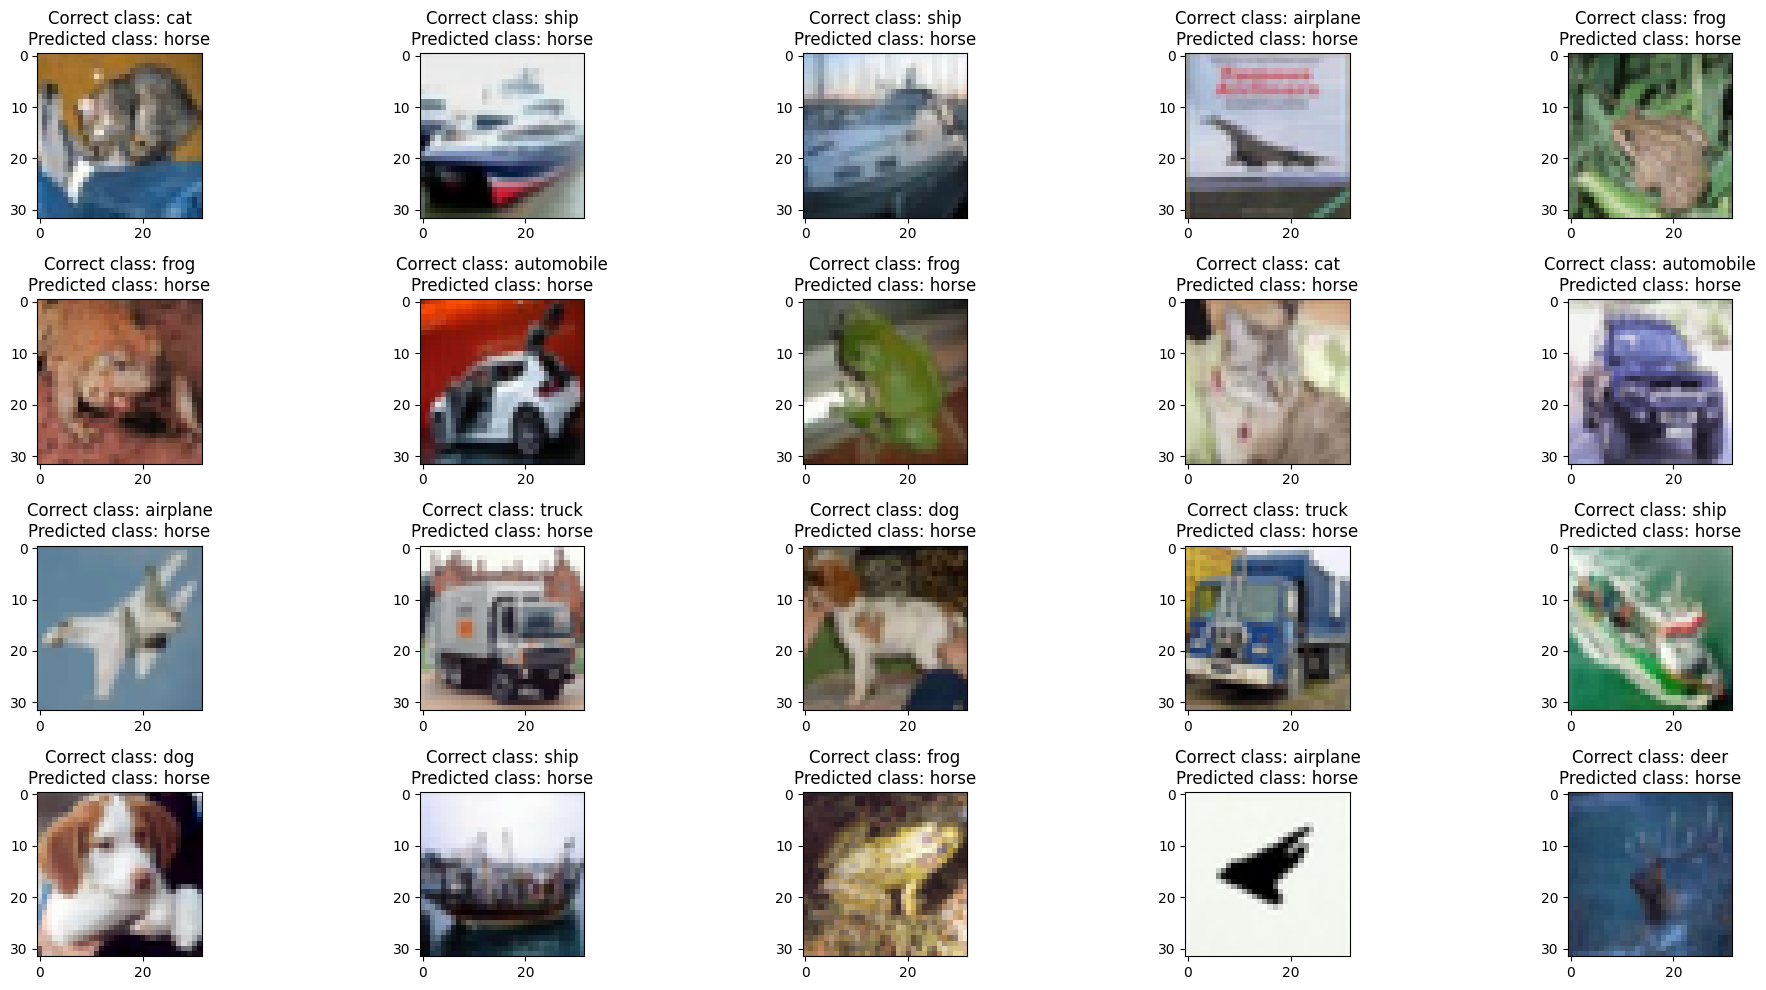

In [18]:
show_misclassified_images(
    misclassified_images[:20], predictions[:20], labels[:20], model.classes
)

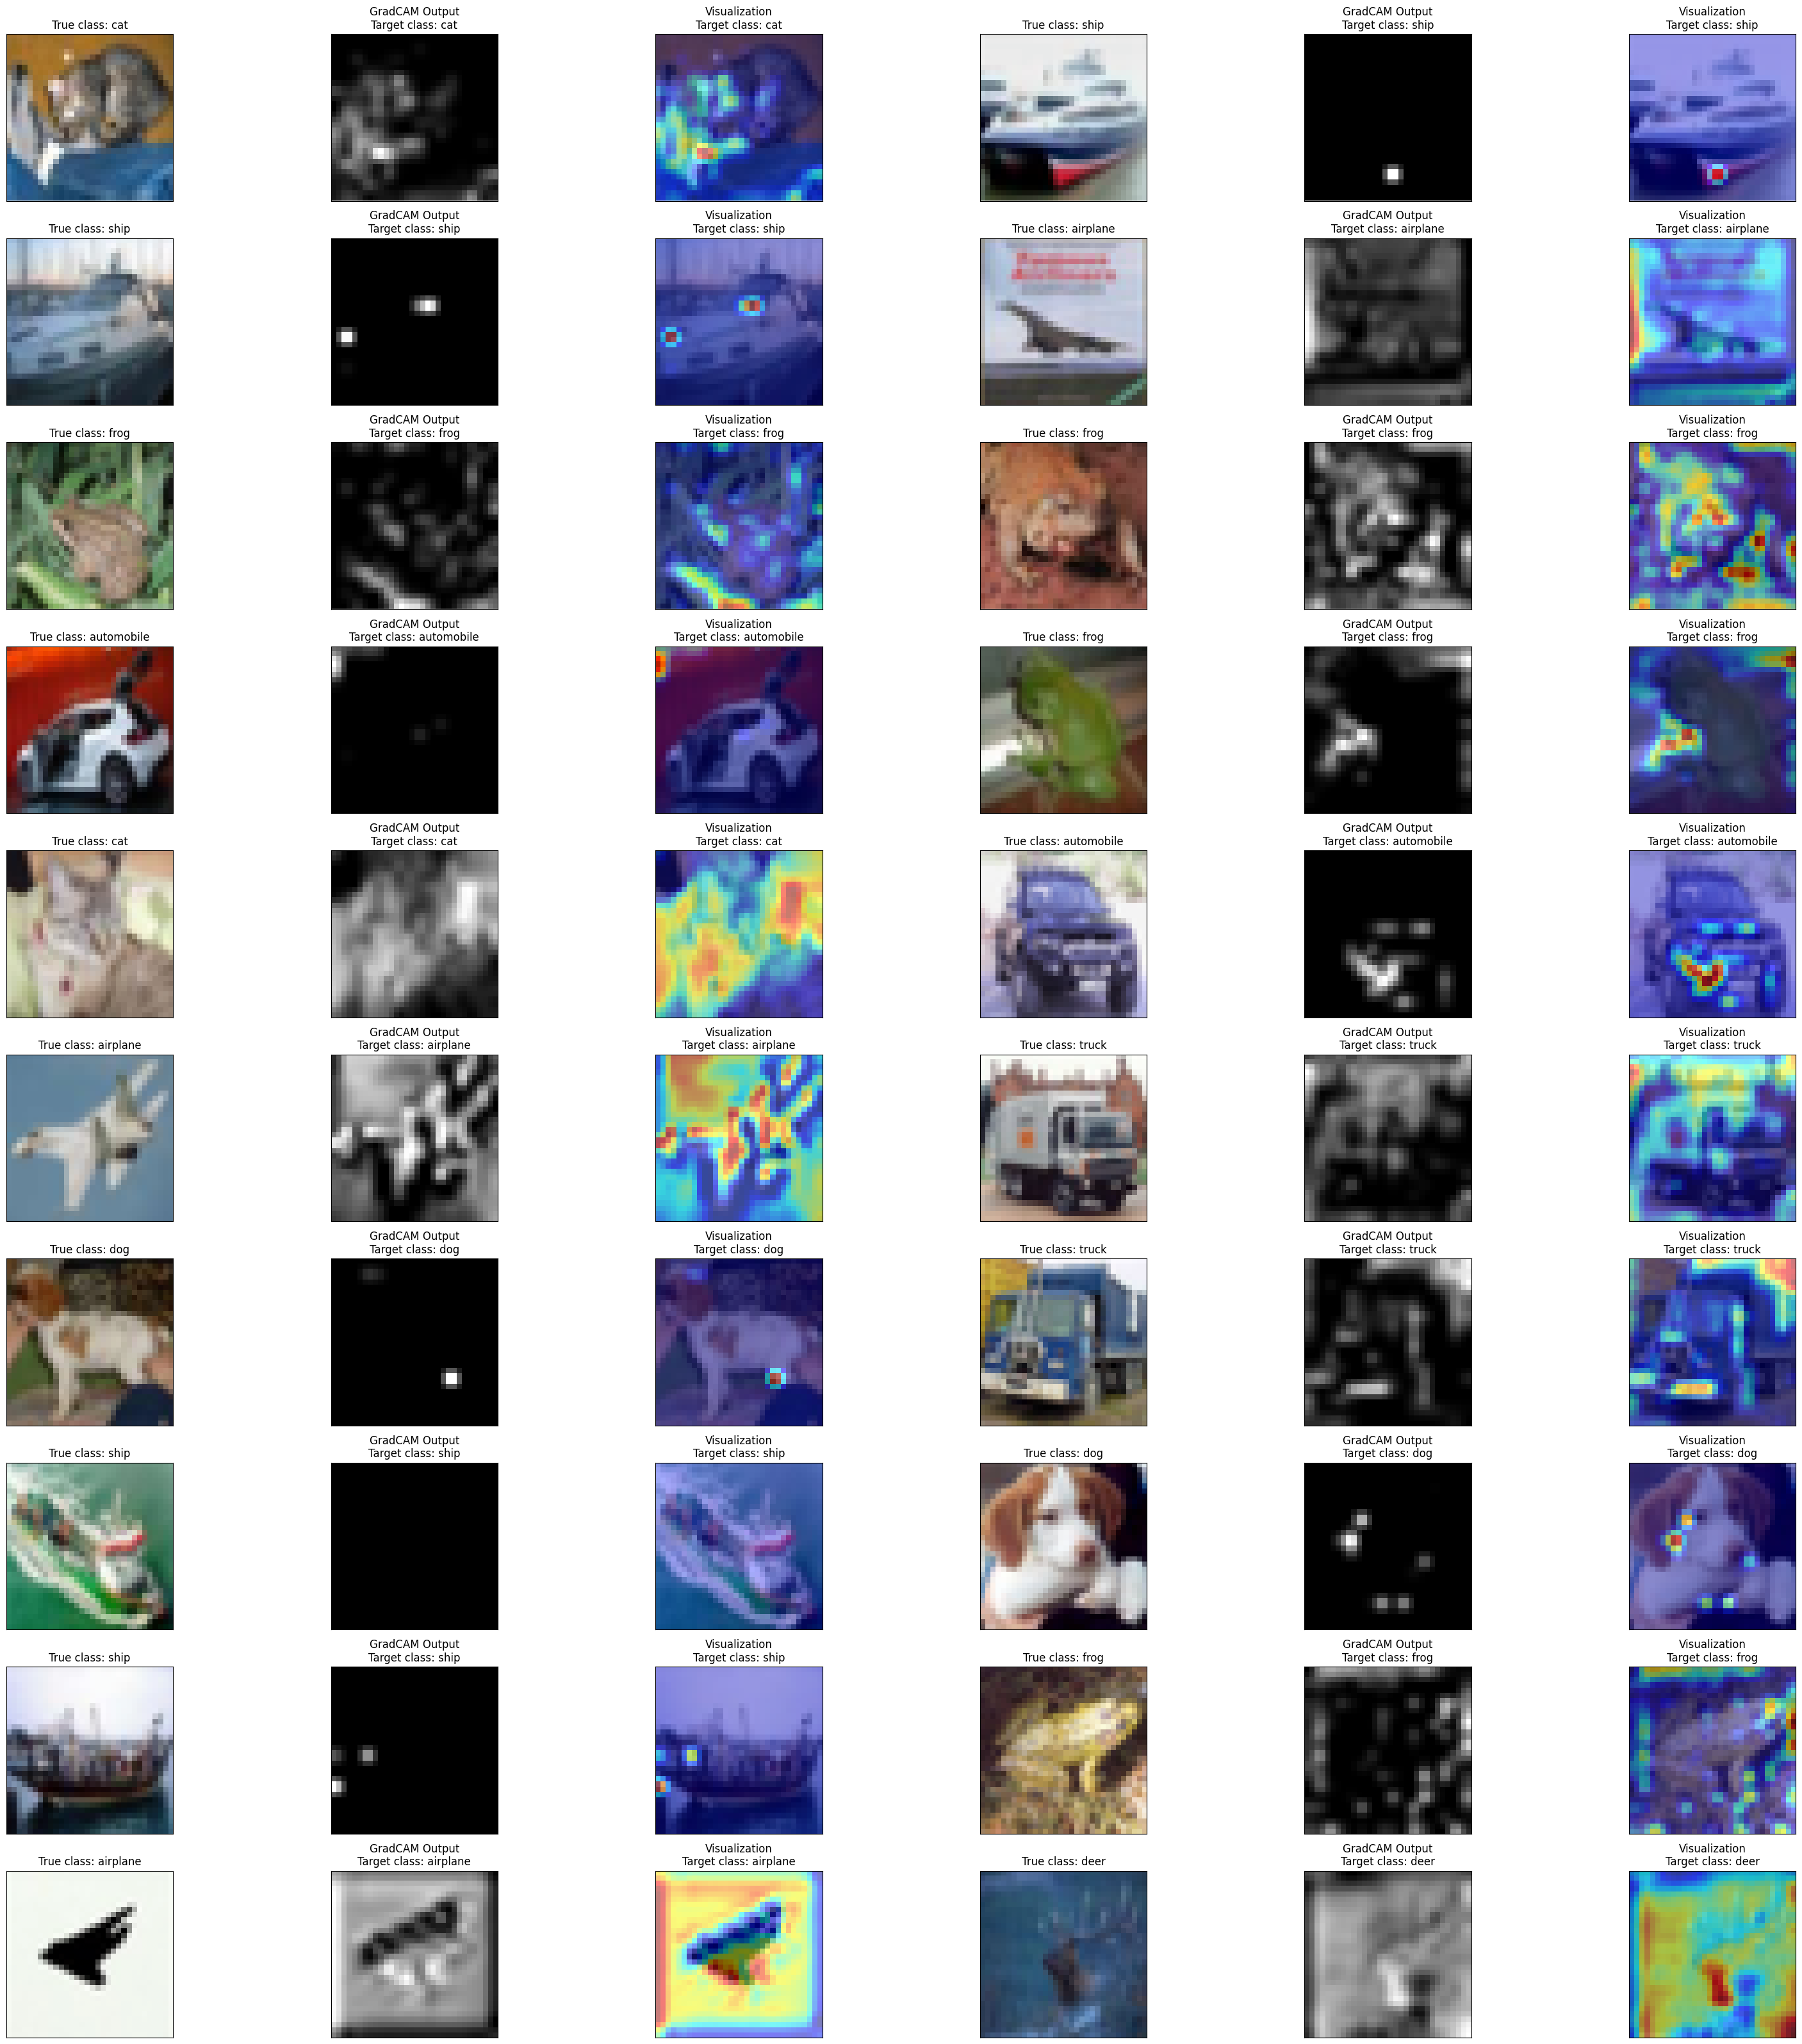

In [20]:
# show_grad_cam(
#     model.model,
#     misclassified_images[:20],
#     labels[:20],
#     labels[:20],
#     "layer2",
#     model.classes,
#     device=torch.device("cpu"),
#     use_cuda=False
# )

show_grad_cam(
    model.model,
    misclassified_images[:20],
    labels[:20],
    labels[:20],
    -1,
    model.classes,
    device=torch.device("cpu"),
    use_cuda=False
)